In [2]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct

In [3]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)

In [4]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter

In [5]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

<h2>30. 12. 2024.</h2>

<h3>Lightweaver minimum intensity maps</h3>

In [6]:
Vx_Imin = fits.open("FLCT_fwhm_600_dt_30_LWminIcmap_tracked.fits")[0].data
Vy_Imin = fits.open("FLCT_fwhm_600_dt_30_LWminIcmap_tracked.fits")[1].data

<h3>Lightweaver line core intensity</h3>

In [7]:
Vx_lc = fits.open("lw_fwhm_600_dt_30_tracked_68.fits")[0].data
Vy_lc = fits.open("lw_fwhm_600_dt_30_tracked_68.fits")[1].data

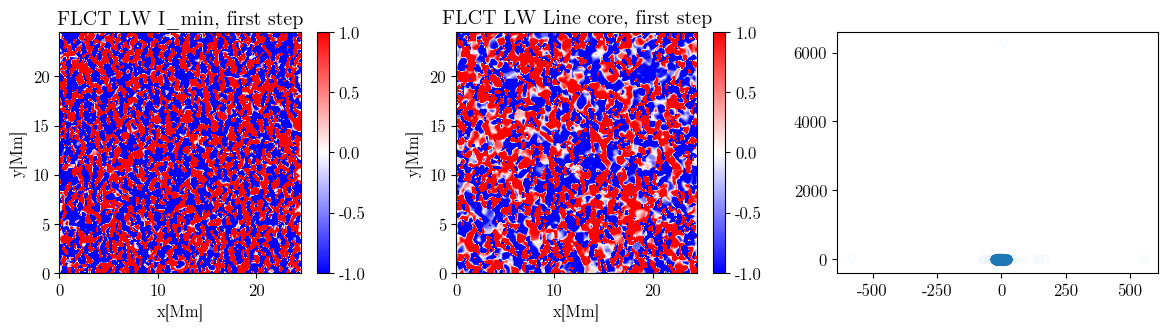

In [14]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("FLCT LW I_min, first step")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Imin[0, :, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("FLCT LW Line core, first step")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_lc[0, :, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(133)
plt.scatter(Vx_Imin[0, :, :].flatten(), Vx_lc[0, :, :].flatten(), alpha=0.02)
#plt.xlim([-5,5])
#plt.ylim([-5,5])
fig.tight_layout()
#plt.savefig("LW_nesto", dpi = 100)

In [10]:
R_x = pearsonr(Vx_Imin[0,:,:].flatten(), Vx_lc[0,:,:].flatten())
print(R_x)

PearsonRResult(statistic=0.07475524250994306, pvalue=0.0)


In [11]:
R_y = pearsonr(Vy_Imin[0,:,:].flatten(), Vy_lc[0,:,:].flatten())
print(R_y)

PearsonRResult(statistic=0.10410251555744832, pvalue=0.0)


<h3>Time averaging</h3>

In [16]:
Vx_LWImin = temporal_avg(Vx_Imin, 1, 90)
Vy_LWImin = temporal_avg(Vy_Imin, 1, 90)

In [17]:
Vx_LWlc = temporal_avg(Vx_lc, 1, 90)
Vy_LWlc = temporal_avg(Vy_lc, 1, 90)

In [18]:
R_xtav = pearsonr(Vx_LWImin.flatten(), Vx_LWlc.flatten())
print(R_xtav)

PearsonRResult(statistic=0.03397135258945691, pvalue=0.0)


In [19]:
R_ytav = pearsonr(Vy_LWImin.flatten(), Vy_LWlc.flatten())
print(R_ytav)

PearsonRResult(statistic=0.09807009558410915, pvalue=0.0)


<h3>Šta ako korigujemo outlier pixele?</h3>

In [46]:
# Referent Muram velocity:

def mean_v_from_file(file):
    v_x = fits.open(file)[0].data
    v_x.shape
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -10.0)
    v_x[small] = -10.0
    big = np.where(v_x > 10.0)
    v_x[big] = 10.0
    return v_x

In [47]:
v_lw_68_x = mean_v_from_file("lw_fwhm_600_dt_30_tracked_68.fits")

In [48]:
v_lw_min_x = mean_v_from_file("FLCT_fwhm_600_dt_30_LWminIcmap_tracked.fits")

In [49]:
R_xmean = pearsonr(v_lw_68_x[:,:].flatten(), v_lw_min_x[:,:].flatten())
print(R_xmean)

PearsonRResult(statistic=0.3628926916013253, pvalue=0.0)


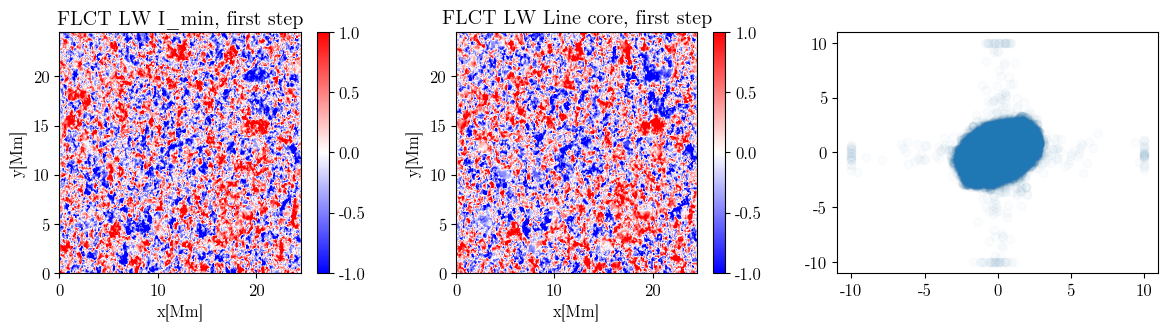

In [50]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("FLCT LW I_min, first step")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(v_lw_min_x[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("FLCT LW Line core, first step")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(v_lw_68_x[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(133)
plt.scatter(v_lw_68_x[:,:].flatten(), v_lw_min_x[:,:].flatten(), alpha=0.02)
#plt.xlim([-5,5])
#plt.ylim([-5,5])
fig.tight_layout()
#plt.savefig("LW_nesto", dpi = 100)

In [25]:
## Tracking temperature at logtau = -3, 30 s cadence
## Argument za bolji parametar za pracenje u odnosu na one rezultate.